In [25]:
#Llamar al dataloader
%run DataLoader.ipynb
import numpy as np

In [26]:
dataset.head(5)

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [27]:
#estadisticas de la longitud de los tweets
dataset.longitud.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: longitud, dtype: float64

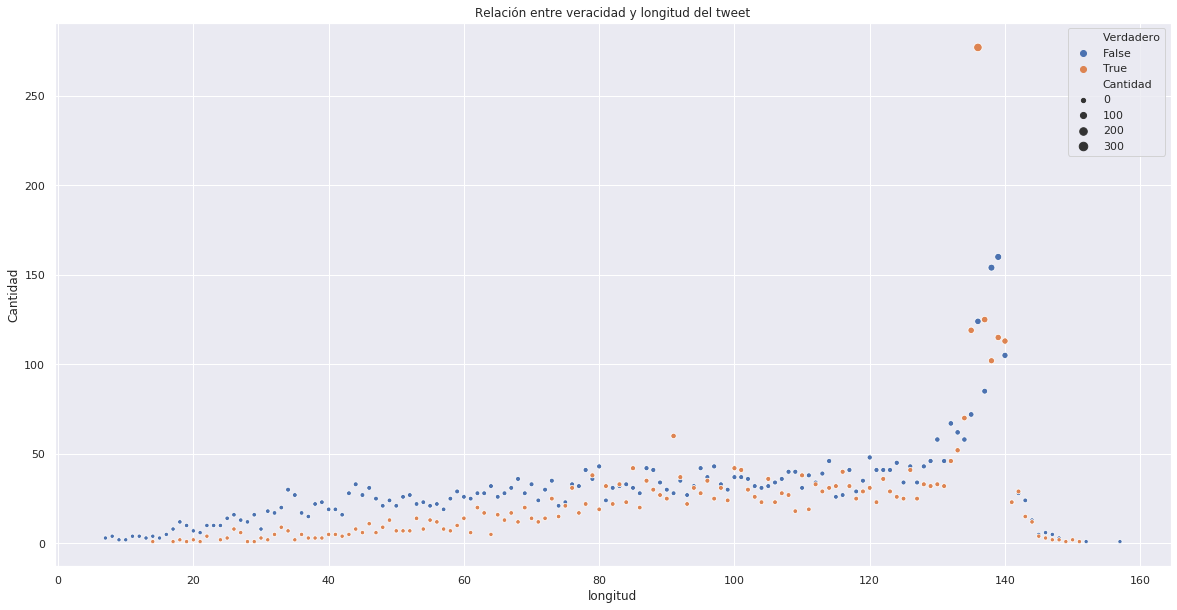

In [28]:
#Tweets por longitud y veracidad
grupo = dataset.groupby(['longitud', 'target']).agg({'target':['count']})
grupo.columns = ['Cantidad']

grupo = grupo.reset_index()
grupo = grupo.rename(columns={'target':'Verdadero'})

sns.set()
ax = sns.scatterplot(x = 'longitud', y = 'Cantidad', data = grupo, hue = 'Verdadero', size = 'Cantidad')
ax.set_title('Relación entre veracidad y longitud del tweet')
fig = ax.get_figure()
#fig.savefig('figure.png')

In [29]:
# Creo dos df con los tweets verdaderos y falsos respectivamente
# de tratarse de un DF más grande debería utilizar otra estrategia
# como por ejemplo hacer un groupby por la columna target
tweet_len_true = dataset.loc[(dataset['target']),'longitud']
tweet_len_false = dataset.loc[(dataset['target']==False),'longitud']

tweet_len_true

id
1         69
4         38
5        133
6         65
7         88
        ... 
10869     83
10870    125
10871     65
10872    137
10873     94
Name: longitud, Length: 3271, dtype: int64

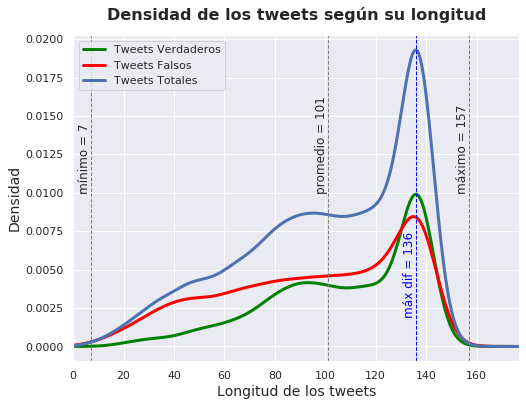

In [30]:
from scipy.stats import gaussian_kde

tweet_totals = dataset['longitud'].count()
tweet_true_count = tweet_len_true.count()
tweet_false_count = tweet_len_false.count()

kernel_true = gaussian_kde(tweet_len_true)
kernel_false = gaussian_kde(tweet_len_false)
x_lim = dataset['longitud'].max()+20
X = np.linspace(0,x_lim,200)
Y_true = kernel_true.evaluate(X)*tweet_true_count/tweet_totals
Y_false = kernel_false.evaluate(X)*tweet_false_count/tweet_totals

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y_true , label='Tweets Verdaderos', color = 'green', linewidth=3)
ax.plot(X, Y_false , label='Tweets Falsos', color = 'red', linewidth=3)
dataset['longitud'].plot(kind='kde', ax=ax, label='Tweets Totales', linewidth=3, xlim=(0, x_lim))

plt.xlabel('Longitud de los tweets',fontsize=14)
plt.ylabel('Densidad',fontsize=14)
plt.title('Densidad de los tweets según su longitud',fontsize=16,fontweight='bold', pad = 15)
#ax.set_facecolor('lightyellow')

# calculo las estadísticas pedidas sobre el total de los tweets
min_len = dataset['longitud'].min()
mean_len = dataset['longitud'].mean()
max_len = dataset['longitud'].max()

# calculo el punto donde hay mayor diferencia entre los 
# tweets verdaderos y los falsos
max_diff = (tweet_len_true.value_counts()-tweet_len_false.value_counts()).dropna().abs().idxmax()

ax.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_diff, color='blue', linestyle='--', linewidth=1)

plt.text(min_len - 5 , ax.get_ylim()[1]/2, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 5 , ax.get_ylim()[1]/2, 'promedio = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(max_len - 5 , ax.get_ylim()[1]/2, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

plt.text(max_diff- 5 , ax.get_ylim()[1]/10, 'máx dif = %d' %max_diff, rotation = 90, fontsize = 12, color = 'blue')

plt.legend()